In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from Config import df

/Users/davinanaya/Desktop/ELE-Machine-Learning/repo


In [2]:
df_rows, df_columns = df.shape
df_rows

1025010

### a.) Extracción de caracteristicas y columnas

In [4]:
cards = df[["C1", "C2", "C3", "C4", "C5"]]
# suits = df[["S1", "S2", "S3", "S4", "S5"]]

# Separando los datos en características y objetivo
X = df[["S1", "C1","S2", "C2", "S3", "C3", "S4", "C4", "S5", "C5"]] # df.drop(['CLASS'] + list(allColumns.columns), axis=1)
y = df['CLASS']


X = X.head(int(df_rows/2))
y = y.head(int(df_rows/2))
X

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,1,10,1,11,1,13,1,12,1,1
1,2,11,2,13,2,10,2,12,2,1
2,3,12,3,11,3,13,3,10,3,1
3,4,10,4,11,4,1,4,13,4,12
4,4,1,4,13,4,12,4,11,4,10
...,...,...,...,...,...,...,...,...,...,...
512500,4,12,1,5,2,13,2,10,2,9
512501,3,9,1,3,4,8,3,13,3,8
512502,2,3,4,8,4,10,1,11,1,6
512503,3,11,1,4,1,2,4,9,3,6


In [15]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Entrenar el clasificador SVM en el conjunto de entrenamiento
# Inicializar el clasificador SVM
svm_classifier = SVC(kernel='linear')

svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

In [36]:

print("Accuracy:", accuracy_score(y_test, y_pred))

print("Precision:", precision_score(y_test, y_pred, pos_label='positive', average='weighted'))

# print("Recall:", recall_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

Accuracy: 0.5008146261987688
Precision: 0.25081528981461254
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     51334
           1       0.00      0.00      0.00     43315
           2       0.00      0.00      0.00      5029
           3       0.00      0.00      0.00      2071
           4       0.00      0.00      0.00       381
           5       0.00      0.00      0.00       205
           6       0.00      0.00      0.00       140
           7       0.00      0.00      0.00        19
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         2

    accuracy                           0.50    102501
   macro avg       0.05      0.10      0.07    102501
weighted avg       0.25      0.50      0.33    102501



/Users/davinanaya/opt/anaconda3/envs/ml-imgs/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/davinanaya/opt/anaconda3/envs/ml-imgs/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/davinanaya/opt/anaconda3/envs/ml-imgs/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

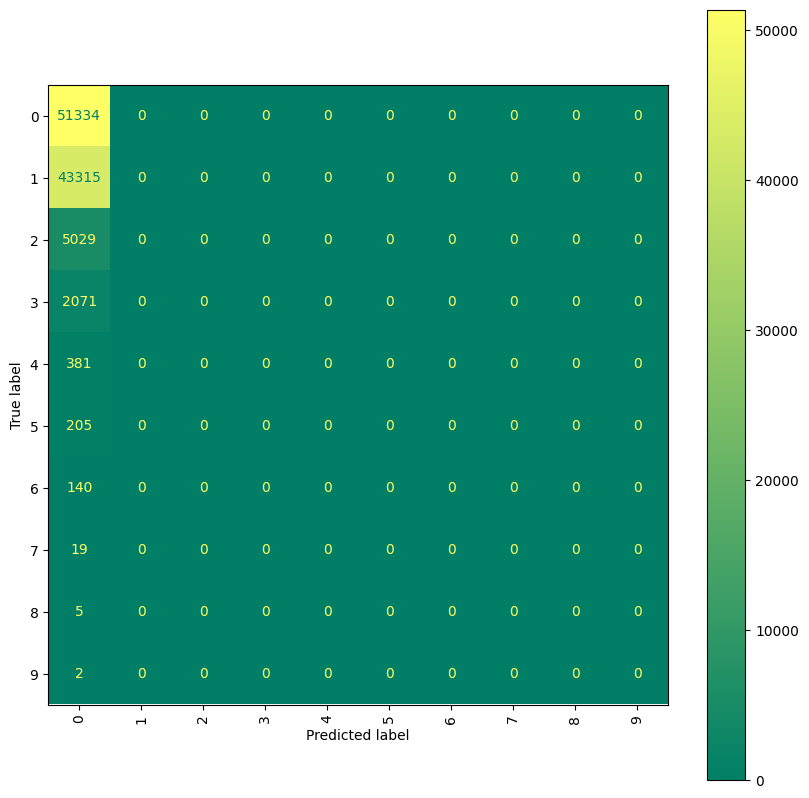

In [54]:
result_confusion_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = result_confusion_matrix)

# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = cm_display.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_predV2 = clf.predict(X_test)

In [40]:

print("Accuracy:", accuracy_score(y_test, y_predV2))

# print("Precision:", precision_score(y_test, y_pred))

# print("Recall:", recall_score(y_test, y_predV2))

print(classification_report(y_test, y_predV2))

Accuracy: 0.5014292543487381
              precision    recall  f1-score   support

           0       0.51      0.82      0.63     51334
           1       0.45      0.21      0.29     43315
           2       0.00      0.00      0.00      5029
           3       0.00      0.00      0.00      2071
           4       0.00      0.00      0.00       381
           5       0.97      1.00      0.98       205
           6       0.00      0.00      0.00       140
           7       0.00      0.00      0.00        19
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         2

    accuracy                           0.50    102501
   macro avg       0.19      0.20      0.19    102501
weighted avg       0.45      0.50      0.44    102501



/Users/davinanaya/opt/anaconda3/envs/ml-imgs/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/davinanaya/opt/anaconda3/envs/ml-imgs/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/davinanaya/opt/anaconda3/envs/ml-imgs/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [5]:
result_confusion_matrixV2 = confusion_matrix(y_test, y_predV2)
cm_displayV2 = ConfusionMatrixDisplay(confusion_matrix = result_confusion_matrixV2)

# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = cm_displayV2.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

NameError: name 'y_test' is not defined

In [23]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg = logreg.fit(X_train, y_train)
y_predLogisticRegression = logreg.predict(X_test)


/Users/davinanaya/opt/anaconda3/envs/ml-imgs/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:

print("Accuracy:", accuracy_score(y_test, y_predV2))

# print("Precision:", precision_score(y_test, y_pred))

# print("Recall:", recall_score(y_test, y_predV2))

print(classification_report(y_test, y_predV2))

Accuracy: 0.5014292543487381
              precision    recall  f1-score   support

           0       0.51      0.82      0.63     51334
           1       0.45      0.21      0.29     43315
           2       0.00      0.00      0.00      5029
           3       0.00      0.00      0.00      2071
           4       0.00      0.00      0.00       381
           5       0.97      1.00      0.98       205
           6       0.00      0.00      0.00       140
           7       0.00      0.00      0.00        19
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         2

    accuracy                           0.50    102501
   macro avg       0.19      0.20      0.19    102501
weighted avg       0.45      0.50      0.44    102501



/Users/davinanaya/opt/anaconda3/envs/ml-imgs/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/davinanaya/opt/anaconda3/envs/ml-imgs/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/davinanaya/opt/anaconda3/envs/ml-imgs/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [28]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_predV3 = rf.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, y_predV3)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_predV2))

Accuracy: 0.5011073062701827
              precision    recall  f1-score   support

           0       0.51      0.82      0.63     51334
           1       0.45      0.21      0.29     43315
           2       0.00      0.00      0.00      5029
           3       0.00      0.00      0.00      2071
           4       0.00      0.00      0.00       381
           5       0.97      1.00      0.98       205
           6       0.00      0.00      0.00       140
           7       0.00      0.00      0.00        19
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         2

    accuracy                           0.50    102501
   macro avg       0.19      0.20      0.19    102501
weighted avg       0.45      0.50      0.44    102501



/Users/davinanaya/opt/anaconda3/envs/ml-imgs/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/davinanaya/opt/anaconda3/envs/ml-imgs/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/davinanaya/opt/anaconda3/envs/ml-imgs/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,